In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [517]:
class Node:
    def __init__(self, b, col, value = None, height = 0, Mode = None):
        self.b = b
        self.col = col
        self.value = value
        self.LNode = None
        self.RNode = None
        self.height = height
        self.Mode = Mode

In [518]:
def Gini(y):
    Gini = 1
    try:
        N = y.shape[0]
    except:
        return Gini
    
    for k in [1, -1]:
        Gini += -(np.sum(y == k)/N)**2
    return Gini

In [519]:
def DStump(X, y):
    row, col = X.shape
    X_sort = np.sort(X, axis = 0)
    thresList = np.r_[[X_sort[0,:]-1], (X_sort[0:-1,:] + X_sort[1:,:])/2, [X_sort[-1,:]+1]]
    minPurity = y.shape[0]
    DSb = 0
    DScol = 0
    for c in range(col):
        for i in range(thresList.shape[0]):
        
            y0 = y[ X[:,c] <  thresList[i,c]]
            y1 = y[ X[:,c] >= thresList[i,c]]
            Purity = y0.shape[0]*Gini(y0)+y1.shape[0]*Gini(y1)
            if minPurity > Purity:
                minPurity = Purity
                DSb = thresList[i,c]
                DScol = c
               
    return DSb, DScol

In [520]:
def DTreeFull(X, y):
    
    if (np.sum(y!=y[0])==0 or X.shape[0]==1 or np.sum(X!=X[0, :])==0):
        node = Node(None, None, y[0])
        return node
    
    DSb, DScol = DStump(X, y)
    #print(DSb,DScol)
    LX = X[ (X[:, DScol] < DSb) , :]
    RX = X[ (X[:, DScol] >= DSb), :]
    
    Ly = y[ (X[:, DScol] < DSb) ]
    Ry = y[ (X[:, DScol] >= DSb)]
    
    if (sum(y == -1) >sum(y == 1)):
        Mode = -1
    else:
        Mode = 1
        
    node = Node(DSb, DScol, Mode = Mode)
    
    
    node.LNode = DTree(LX, Ly)
    node.RNode = DTree(RX, Ry)
 
    
    return node

In [521]:
data = pd.read_csv('hw3_train.dat', sep='\s+', header=None)
X_train = data.iloc[:,0:2].values
y_train = data.iloc[:,2].values
data = pd.read_csv('hw3_test.dat', sep='\s+', header=None)
X_test = data.iloc[:,0:2].values
y_test = data.iloc[:,2].values

In [522]:
def nodeH(node):
    
    h = 0 
    if node == None:

        return 
    if node.LNode == None and node.RNode == None:
        
        if node.height > h: 
            h = node.height
        return h

    if node.LNode != None:

        lh = nodeH(node.LNode)
    if node.RNode != None:

        rh = nodeH(node.RNode)
        
    print('MaxH=',h)
    return max(h,lh,rh)


In [523]:
def internal_node(node):
    
    if node == None:
        
        return 0
    if node.LNode == None and node.RNode == None:
        print('==End',node.value, node.height)
        return 0
    l = 0; r = 0
    if node.LNode != None:

        print('L',node.b,node.col, node.height+1,'Mode=',node.Mode,'Value=',node.value)
        l = internal_node(node.LNode)
    if node.RNode != None:

        print('R',node.b,node.col,node.height+1,'Mode=',node.Mode,'Value=',node.value)
        r = internal_node(node.RNode)
    return 1 + l + r


In [524]:
def setNodeH(node):
    
    if node == None:
        
        return 0
    if node.LNode == None and node.RNode == None:

        return 0

    if node.LNode != None:
        LH = node.height + 1
        node.LNode.height = LH

        setNodeH(node.LNode)
    if node.RNode != None:
        RH = node.height + 1
        node.RNode.height = RH

        setNodeH(node.RNode)
    return node


In [525]:
node1 = node0
setNodeH(node0)

In [526]:
def NodePrune(node, MaxH = np.inf):
    
    if node == None:
        
        return 
    if node.LNode == None and node.RNode == None:

        return 

    if node.LNode != None:
        if node.LNode.height > MaxH:
            node.value = node.Mode
        node.LNode = NodePrune(node.LNode,MaxH-1)
    if node.RNode != None:
        if node.RNode.height > MaxH:
            node.value = node.Mode
        node.RNode = NodePrune(node.RNode,MaxH-1)

    return node

In [527]:
node0 = DTree(X_train, y_train)

nodeH(setNodeH(node0))

MaxH= 0
MaxH= 0
MaxH= 0
MaxH= 0
MaxH= 0
MaxH= 0
MaxH= 0
MaxH= 0
MaxH= 0
MaxH= 0


C:\Users\Morris\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


5

In [528]:
nodeP = NodePrune(setNodeH(node0),2)
#internal_node(nodeP)

In [529]:
def predictDT(node, X,MaxH=np.inf):
    if node.value is not None:
        
        return node.value
        
    b = node.b
    c = node.col
    
    if node.height >= MaxH:
        #print('height' , node.height)
        return node.Mode
    
    if X[c] < b:
        return predictDT(node.LNode,X, MaxH)
    else:
        return predictDT(node.RNode,X, MaxH)
    
def predict(node, Xall,MaxH=np.inf):
    row = Xall.shape[0]
    ypred = np.zeros(row)
    for i in range(row):
        ypred[i] = predictDT(node,Xall[i,:],MaxH)
    return ypred

def err01(ypred, y):
    return np.sum(ypred != y)/y.shape[0]

In [540]:
print('Ein=',err01(predict(node0,X_train),y_train))


Ein= 0.0


In [541]:
print('Eout=',err01(predict(node0,X_test),y_test))

Eout= 0.126


In [543]:
ein = []
eout = []
for h in range(5):

    ein = ein + [err01(predict(node0,X_train,h+1),y_train)]
    eout = eout + [err01(predict(node0,X_test,h+1),y_test)]

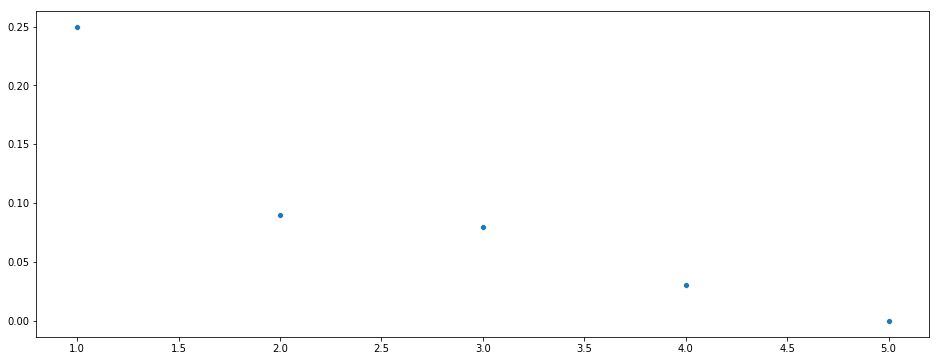

In [551]:
plt.figure(figsize=(16, 6))
sns.scatterplot(range(1,6),ein)

Q12: 大致上是高度越高，Ein越小。因為高度越高，可以branch越多次。

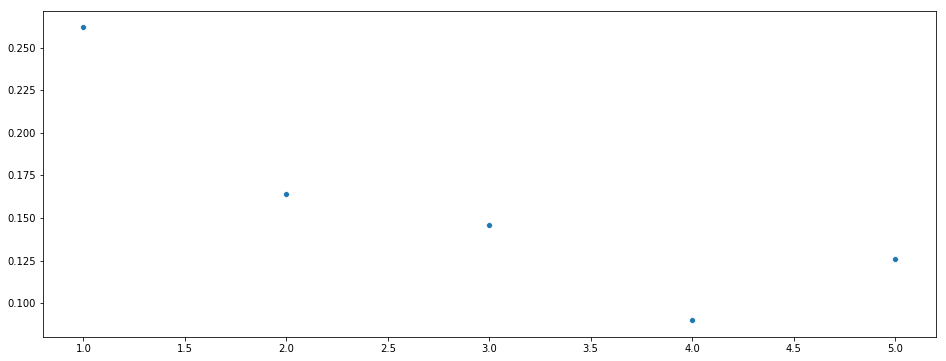

In [552]:
plt.figure(figsize=(16, 6))
sns.scatterplot(range(1,6),eout)

Q13:不一定是高度越高，Eout越小。反在在H=4時,Eout最低

In [535]:
def run_node(node):
    
    if node == None:
        
        return 
    if node.LNode == None and node.RNode == None:
        print('==End==','Value=',node.value,'h=', node.height)
    
    #print('Node splits at col= ',node.col,' h=',node.height)
    
    if node.LNode != None:

        print('LNode is smaller than',node.b ,'Mode=',node.Mode,'Value=',node.value)
        run_node(node.LNode)
    if node.RNode != None:
        print('RNode is greater than',node.b ,'Mode=',node.Mode,'Value=',node.value)
       
        run_node(node.RNode)
    return 


In [536]:
run_node(node0)

LNode is smaller than 0.626233 Mode= -1 Value= None
LNode is smaller than 0.22443950000000001 Mode= 1 Value= None
LNode is smaller than 0.11515275 Mode= -1 Value= None
==End== Value= 1 h= 3
RNode is greater than 0.11515275 Mode= -1 Value= None
==End== Value= -1 h= 3
RNode is greater than 0.22443950000000001 Mode= 1 Value= None
LNode is smaller than 0.541508 Mode= 1 Value= None
LNode is smaller than 0.3586205 Mode= 1 Value= None
LNode is smaller than 0.501625 Mode= 1 Value= None
==End== Value= 1 h= 5
RNode is greater than 0.501625 Mode= 1 Value= None
==End== Value= -1 h= 5
RNode is greater than 0.3586205 Mode= 1 Value= None
LNode is smaller than 0.26075149999999997 Mode= -1 Value= None
==End== Value= 1 h= 5
RNode is greater than 0.26075149999999997 Mode= -1 Value= None
==End== Value= -1 h= 5
RNode is greater than 0.541508 Mode= 1 Value= None
LNode is smaller than 0.285925 Mode= 1 Value= None
LNode is smaller than 0.26603849999999996 Mode= 1 Value= None
==End== Value= 1 h= 5
RNode is gre